In [1]:
# Load data
import pandas as pd


data = pd.read_csv("../models/Boiler_emulator_dataset.csv")
data

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Condition,Class
0,1,283,333.0,363.574744,3.0,%=0.05,Lean
1,1,283,333.0,362.349517,3.0,%=0.1,Nominal
2,1,283,333.0,361.216941,3.0,%=0.15,ExcessAir
3,1,283,333.0,360.166890,3.0,%=0.20,ExcessAir
4,1,283,333.0,359.190662,3.0,%=0.25,ExcessAir
...,...,...,...,...,...,...,...
27275,3,303,333.0,341.109962,12.0,Nominal,Nominal
27276,4,303,333.0,341.112750,12.0,Nominal,Nominal
27277,1,303,333.0,340.764696,12.5,Nominal,Nominal
27278,3,303,333.0,340.786085,12.5,Nominal,Nominal


In [2]:
# Extract classes
classes = data["Class"].unique()
classes

array(['Lean', 'Nominal', 'ExcessAir', 'Fouling', 'Scaling'], dtype=object)

In [3]:
# Explore condition (Not part of input features)

conditions = {}
for c in classes:
    conditions[c] = data[data["Class"] == c]["Condition"].unique()

conditions

{'Lean': array(['%=0.05'], dtype=object),
 'Nominal': array(['%=0.1', 'Nominal'], dtype=object),
 'ExcessAir': array(['%=0.15', '%=0.20', '%=0.25', '%=0.3', '%=0.35', '%=0.40',
        '%=0.45', '%=0.50'], dtype=object),
 'Fouling': array(['F = 0.01', 'F = 0.06', 'F = 0.11', 'F = 0.16', 'F = 0.21',
        'F = 0.26', 'F = 0.31', 'F = 0.36', 'F = 0.41', 'F = 0.46'],
       dtype=object),
 'Scaling': array(['S = 0.01', 'S = 0.06', 'S = 0.11', 'S = 0.16', 'S = 0.21',
        'S = 0.26', 'S = 0.31', 'S = 0.36', 'S = 0.41', 'S = 0.46'],
       dtype=object)}

In [4]:
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

predictions = data["Class"]
features = data.drop(columns=['Condition', 'Class'])

_, X_valid, _, y_valid = train_test_split(features, predictions, random_state=42)

scaler = MinMaxScaler()
scaler = scaler.fit(features)
X_valid[:] = scaler.transform(X_valid)


one_hot_encoder = OneHotEncoder(sparse_output=False)
target_df= pd.DataFrame(predictions)
one_hot_encoder.fit(target_df)
y_valid = one_hot_encoder.transform(pd.DataFrame(y_valid))
print(one_hot_encoder.get_feature_names_out(['Class']))


model = load_model('../models/keras_model_2.keras')


x = model.evaluate(X_valid, y_valid)

2025-04-17 19:41:42.151834: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-17 19:41:42.165897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744911702.183231  102144 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744911702.188249  102144 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-17 19:41:42.206106: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

['Class_ExcessAir' 'Class_Fouling' 'Class_Lean' 'Class_Nominal'
 'Class_Scaling']


I0000 00:00:1744911704.947649  102144 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13512 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1744911706.848247  102249 service.cc:148] XLA service 0x7f425401b000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744911706.848294  102249 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-04-17 19:41:46.863203: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744911706.887113  102249 cuda_dnn.cc:529] Loaded cuDNN version 90300


 60/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9004 - f1_score: 0.8376 - loss: 0.1937 - precision_1: 0.9005 - recall_1: 0.8989

I0000 00:00:1744911707.101209  102249 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9020 - f1_score: 0.8270 - loss: 0.1855 - precision_1: 0.9027 - recall_1: 0.9006


In [5]:
pd.DataFrame([{
    "loss": x[0],
    "accuracy": x[1],
    "precision": x[2],
    "recall": x[3],
    }])

,loss,accuracy,precision,recall
0,0.179484,0.904106,0.905217,0.903226


214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

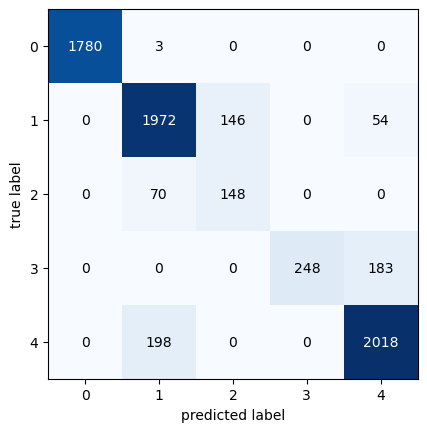

In [7]:
import numpy as np

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


y_pred_2 = model.predict(X_valid)
y_pred_labels_2 = np.argmax(y_pred_2, axis=1)

y_test_labels = np.argmax(y_valid, axis=1)

confusion_mat = confusion_matrix(y_test_labels,y_pred_labels_2)
plot_confusion_matrix(confusion_mat)

In [8]:
[output[6:] for output in one_hot_encoder.get_feature_names_out(['Class'])] # Remove `Class_` from the beginning

['ExcessAir', 'Fouling', 'Lean', 'Nominal', 'Scaling']